# 1.2 Initial Data Analysis
The National Institute of Diabetes and Digestive and Kidney
Diseases conducted a study on 768 adult female Pima Indians living near Phoenix. The
following variables were recorded:
* Pregnancies: number of times pregnant, 
* Glucose: plasma glucose concentration at 2 hours in an oral glucose tolerance test, 
* BloodPressure: diastolic blood pressure (mmHg), 
* SkinThickness: triceps skin fold thickness (mm), 
* Insulin: 2-hour serum insulin (mu U/ml), 
* BMI: body mass index (weight in kg/(height in m2)), 
* DiabetesPedigreeFunction: diabetes pedigree function, 
* Age: age (years) 
* Outcome: a test whether the patient showed signs of diabetes (coded zero if negative, one if positive).

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as sk_lm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale

In [3]:
#ignore future-warning
import warnings
warnings.filterwarnings("ignore")

##### Load the dataset `Pima Indians` : www.ics.uci.edu/˜mlearn/MLRepository.html.

In [4]:
pima=pd.read_csv('./Data/pima-indians-diabetes.csv')
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Check the NAs in the dataset

In [5]:
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Construct numerical summary
The describe( ) function is a quick way to get the usual univariate summary
information. At this stage, we are looking for anything unusual or unexpected, perhaps
indicating a data-entry error. For this purpose, a close look at the minimum and
maximum values of each variable is worthwhile. Starting with pregnant, we see a maximum
value of 17. This is large, but not impossible. However, we then see that the next
five variables have minimum values of zero. No blood pressure is not good for the
health—something must be wrong.

In [6]:
pima.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Sort diastolic and show the first few values.

In [7]:
pima.BloodPressure.sort_values().head(5)

347    0
494    0
222    0
81     0
78     0
Name: BloodPressure, dtype: int64

In [8]:
(pima.BloodPressure==0).sum()

35

We see that the first 35 values are zero. The description that comes with the data says
nothing about it but it seems likely that the zero has been used as a missing value code. For
one reason or another, the researchers did not obtain the blood pressures of 35 patients.
In a real investigation, one would likely be able to question the researchers about what
really happened. Nevertheless, this does illustrate the kind of misunderstanding that can
easily occur. A careless statistician might overlook these presumed missing values and
complete an analysis assuming that these were real observed zeros. If the error was later discovered,
they might then blame the researchers for using zero as a missing value code (not a good choice
since it is a valid value for some of the variables) and not mentioning it in their data description.
Unfortunately such oversights are not uncommon, particularly with datasets of any size
or complexity. The statistician bears some share of responsibility for spotting these mistakes.
##### We set all zero values of the five variables to NA.

In [9]:
missing_rep={'Glucose':0,'BloodPressure':0,'SkinThickness':0,'Insulin':0,'BMI':0}
pima.replace(missing_rep, np.nan, inplace=True)
pima.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [10]:
pima.Outcome.dtype

dtype('int64')

In [11]:
pima.Outcome=pima.Outcome.astype('category')
pima.Outcome=pima.Outcome.cat.rename_categories(['Negative','Positive'])
pima.Outcome.describe()

count          768
unique           2
top       Negative
freq           500
Name: Outcome, dtype: object

In [12]:
pima.Outcome.value_counts()

Negative    500
Positive    268
Name: Outcome, dtype: int64

We now see that 500 cases were negative and 268 were positive.
Now that we have cleared up the missing values and coded the data appropriately, we are
ready to do some plots. 

In [13]:
pimad=pima.BloodPressure.dropna().sort_values()

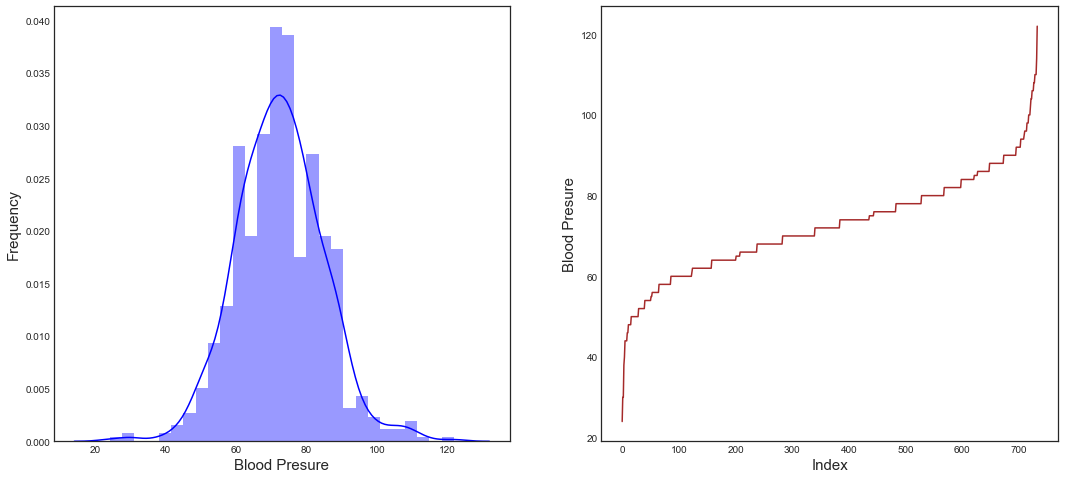

In [14]:
fig, (ax1, ax2)=plt.subplots(ncols=2,sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(18)

#First plot
sns.distplot(pimad,ax=ax1, color='blue')
ax1.set_xlabel('Blood Presure', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)

#Second plot
sns.lineplot(np.arange(len(pimad)), pimad, ax=ax2, color='brown')
ax2.set_ylabel('Blood Presure', fontsize=15)
ax2.set_xlabel('Index', fontsize=15)

plt.show()

Figure 1.1 The first panel shows a histogram of the diastolic blood pressures,
and a kernel density estimate of the
same, while the second shows an index plot of the sorted values.

We see a bell-shaped distribution for the diastolic
blood pressures centered around 70. Another alternative is to simply plot
the sorted data against its index:

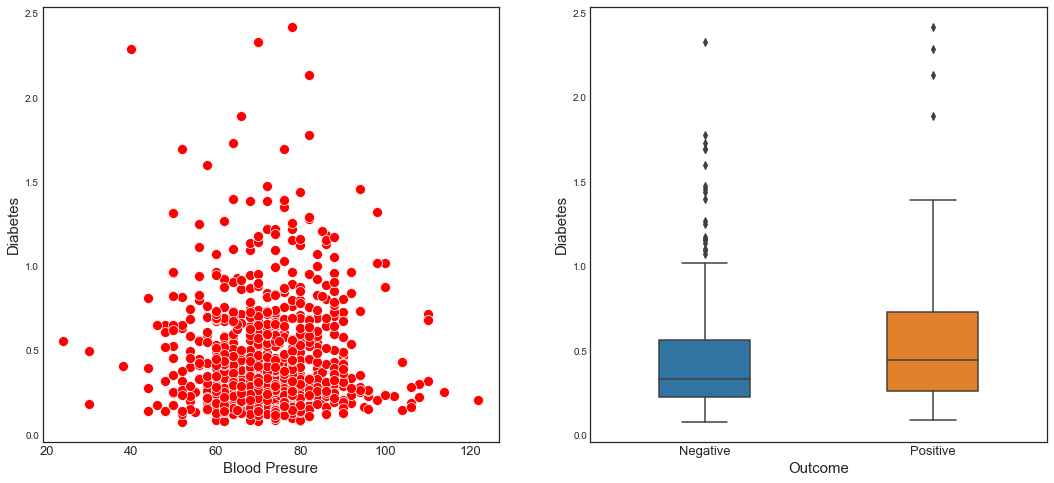

In [15]:
fig, (ax1, ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(18)

#First plot
sns.scatterplot(x=pima.BloodPressure, y=pima.DiabetesPedigreeFunction, 
                markers='o', ax=ax1, color='red', s=100)
ax1.set_xlabel('Blood Presure', fontsize=15)
ax1.set_ylabel('Diabetes', fontsize=15)

#Second plot
sns.boxplot(x=pima.Outcome, y=pima.DiabetesPedigreeFunction, 
            ax=ax2, width=0.4)
ax2.set_xlabel('Outcome', fontsize=15)
ax2.set_ylabel('Diabetes', fontsize=15)


for item in ax2.get_xticklabels():
    item.set_fontsize(13)
for item in ax1.get_xticklabels():
    item.set_fontsize(13)

Figure 1.2 The first panel shows scatterplot of the diastolic blood pressures
against diabetes function and the second shows boxplots
of diastolic blood pressure broken down by test result.

First, we see the standard scatterplot showing two quantitative variables. Second, we see
a side-by-side boxplot suitable for showing a quantitative and a qualititative variable.

We use some alpha transparency in the following plot to distinguish the different levels of test on the scatter plot of the two quantitative variables:

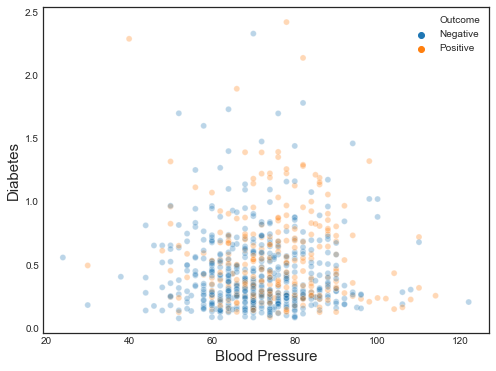

In [16]:
fig, ax=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

#First plot
sns.scatterplot(x='BloodPressure', y='DiabetesPedigreeFunction',
                hue='Outcome',data=pima,alpha=0.3, ax=ax)
ax.set_xlabel('Blood Pressure', fontsize=15)
ax.set_ylabel('Diabetes', fontsize=15)
ax.legend(fontsize=10)

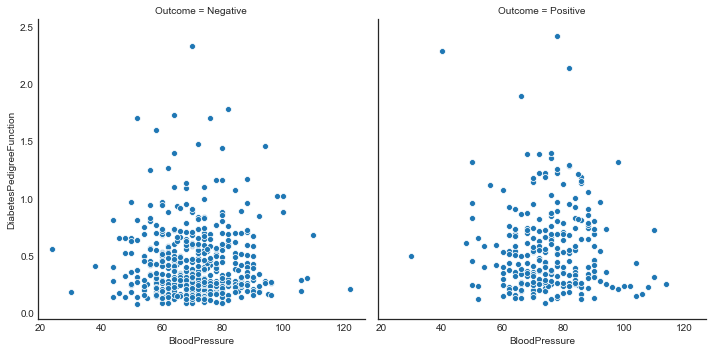

In [17]:
sns.relplot(x='BloodPressure', y='DiabetesPedigreeFunction', data=pima,col='Outcome')

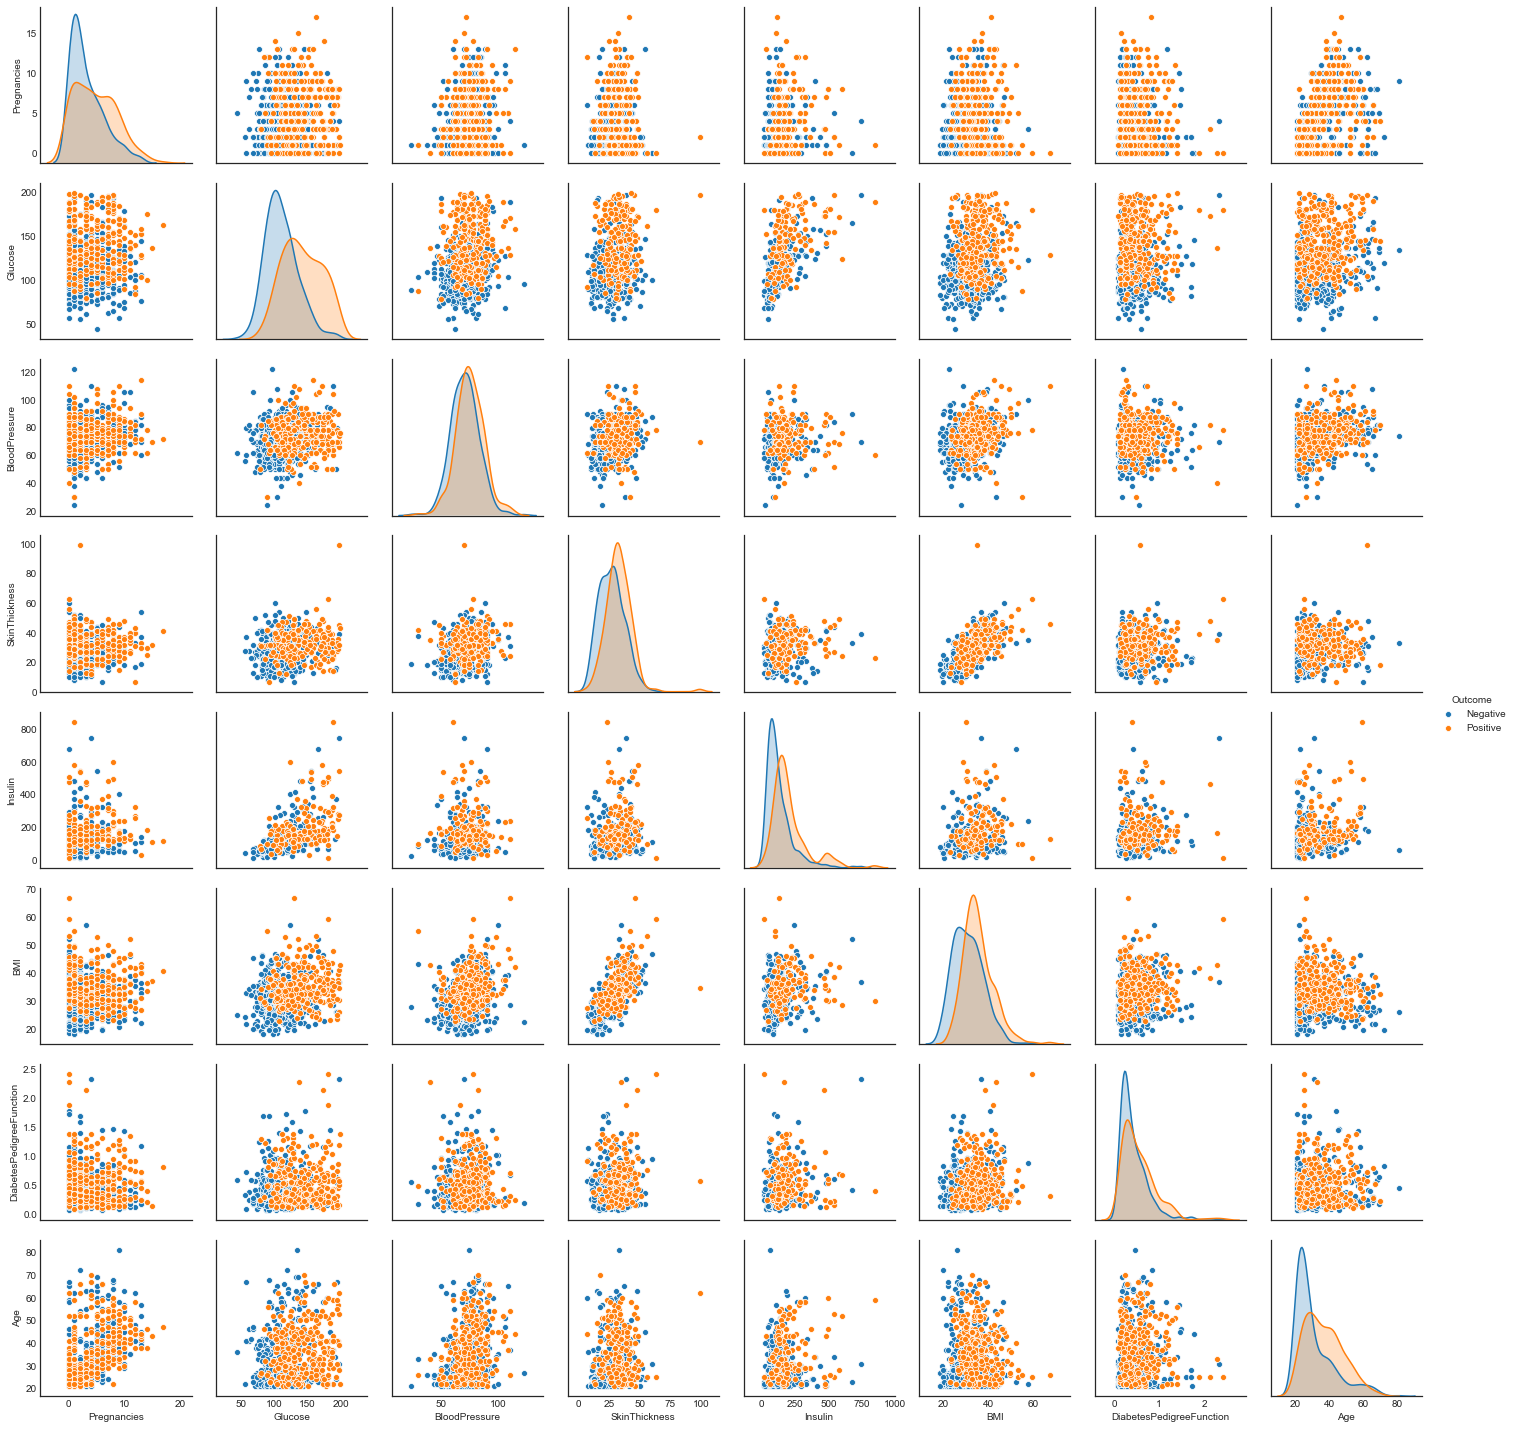

In [18]:
sns.pairplot(data=pima, hue='Outcome')

# 1.3 When to Use Regression Analysis

Regression analysis is used for explaining or modeling the relationship between a single
variable $Y$, called the <font color=blue>response</font>, output or dependent variable; and one or more <font color=blue>predictor</font>,
input, independent or explanatory variables, $X_1,\dots, X_p$. When $p=1$, it is called <font color=blue>simple
regression</font> but when $p>1$ it is called <font color=blue>multiple regression or sometimes multivariate
regression</font>. Remark: When there is more than one $Y$, then it is called <font color=blue>multivariate multiple
regression</font> which we will not be covering explicity here, although you can just do
separate regressions on each Y.

* A regression with `BloodPressure` and `Outcome` as $X$’s and `BMI` as $Y$ would have one predictor that is quantitative and one that is qualitative, which we will consider later in Chapter 13 on analysis of covariance.
* A regression with `Outcome` as $X$ and `BloodPressure` as $Y$ involves just qualitative predictors—a topic called analysis of variance (ANOVA), although this would just be a simple two sample situation.
* A regression of `Outcome` as $Y$ on `BloodPressure` and `BMI` as predictors would involve a qualitative response. A logistic regression could be used.

Extensions exist to handle multivariate responses, binary responses (logistic regression
analysis) and count responses (Poisson regression) among others.

# 1.4 History

Regression-type problems were first considered in the 18th century to aid navigation with
the use of astronomy. Legendre developed the method of least squares in 1805. Gauss
claimed to have developed the method a few years earlier and in 1809 showed that least
squares is the optimal solution when the errors are normally distributed.

Tobias Mayer collected data on the locations of various landmarks on Moon,including the Manilius crater, as they moved relative to the earth. He derived an
equation describing the motion of the moon (called libration) taking the form:$$
\text{arc}=\beta+\alpha \text{sinang}+\gamma\text{cosang}
$$
He wished to obtain values for the three unknowns $\alpha,\beta$ and $\gamma$. The variables `arc`,
`sinang` and `cosang` can be observed using a telescope.

##### Load the dataset `manilius`

In [19]:
manilius=pd.read_csv('./Data/manilius.csv')
manilius.head(5)

,arc,sinang,cosang,group
0,13.166667,0.8836,-0.4682,1
1,13.133333,0.9996,-0.0282,1
2,13.200000,0.9899,0.1421,1
3,14.250000,0.2221,0.9750,3
4,14.700000,0.0006,1.0000,3


In [20]:
manilius.isna().sum()

arc       0
sinang    0
cosang    0
group     0
dtype: int64

Mayer’s solution was to divide the data into three groups so that observations within
each group were similar in some respect. He then computed the sum of the variables
within each group. We can also do this:

In [21]:
moon3=manilius.groupby('group')[['arc','sinang','cosang']].sum()
moon3

,arc,sinang,cosang
group,,,
1,118.133333,8.4987,-0.7932
2,140.283333,-6.1404,1.7443
3,127.533333,2.9777,7.9649


In [22]:
moon3['intercept']=9
moon3.head(5)

,arc,sinang,cosang,intercept
group,,,,
1,118.133333,8.4987,-0.7932,9
2,140.283333,-6.1404,1.7443,9
3,127.533333,2.9777,7.9649,9


Now there are just three equations in three unknowns to be solved. The solution is:

In [23]:
np.linalg.solve(moon3[['intercept','sinang','cosang']], moon3['arc'])

array([14.54458591, -1.48982207,  0.13412639])

##### Use statsmodels to run linear regression

In [24]:
res=smf.ols('arc~sinang+cosang', data=manilius).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    arc   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     719.0
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           3.83e-22
Time:                        10:46:25   Log-Likelihood:                 14.814
No. Observations:                  27   AIC:                            -23.63
Df Residuals:                      24   BIC:                            -19.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5616      0.034    426.846      0.0

In [25]:
res.params

Intercept    14.561624
sinang       -1.504581
cosang        0.091365
dtype: float64

##### Use scikit-learn to run linear regression

In [26]:
y=manilius['arc']
X=manilius[['sinang','cosang']]

In [27]:
resr=sk_lm.LinearRegression()
resr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print('Coefficient:\n',resr.intercept_, resr.coef_)

Coefficient:
 14.561623509901116 [-1.50458123  0.09136504]


#### Read in Family Height Data

In [29]:
families=pd.read_csv('./Data/families.csv')
families.head(5)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


In [30]:
families.isna().sum()

family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64

We might run the following regression:
$$ \text{childHeight}=\alpha+\beta \text{midparentHeight}+\varepsilon$$

In [31]:
reg=smf.ols('childHeight~midparentHeight', data=families).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           8.05e-24
Time:                        10:46:25   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.6362      4.265     

Text(0, 0.5, 'Child Height')

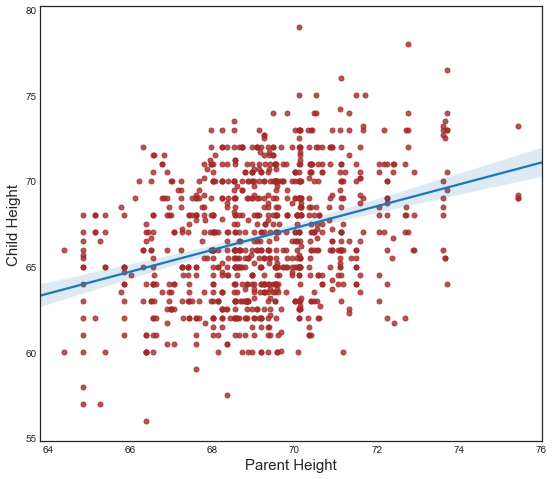

In [32]:
fig, ax=plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(8)

sns.regplot(x='midparentHeight', y='childHeight', 
            data=families, ci=95, order=1, ax=ax, 
            scatter_kws={'color':'brown','s':25})
ax.set_xlabel('Parent Height', fontsize=15)
ax.set_ylabel('Child Height', fontsize=15)

Calculate the parameter manually.

In [33]:
corr=sp.stats.pearsonr(families['childHeight'], families['midparentHeight'])[0]
sdy=np.std(families['childHeight'])
sdx=np.std(families['midparentHeight'])
print(corr,sdy, sdx)

0.3209498960639593 3.577334601005763 1.8014050969207576


In [34]:
beta=corr*sdy/sdx
alpha=np.mean(families['childHeight'])-beta*np.mean(families['midparentHeight'])
print('Coefficient:\n', np.round([alpha, beta],4))

Coefficient:
 [22.6362  0.6374]


# Exercises
#### 1.1 
The dataset `teengamb` concerns a study of teenage gambling in Britain. Make a numerical and graphical summary of the data, commenting on any features that you find interesting. Limit the output you present to a quantity that a busy reader would find sufficient to get a basic understanding of the data.

##### Load the dataset

In [35]:
teengamb=pd.read_table('./Data/teengamb.txt')
teengamb.head(5)

,sex,status,income,verbal,gamble
1,1,51,2.0,8,0.0
2,1,28,2.5,8,0.0
3,1,37,2.0,6,0.0
4,1,28,7.0,4,7.3
5,1,65,2.0,8,19.6


In [36]:
teengamb.isna().sum()

sex       0
status    0
income    0
verbal    0
gamble    0
dtype: int64

In [37]:
teengamb.describe()

,sex,status,income,verbal,gamble
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.404255,45.234043,4.641915,6.659574,19.301064
std,0.496053,17.262944,3.551371,1.856558,31.515866
min,0.000000,18.000000,0.600000,1.000000,0.000000
25%,0.000000,28.000000,2.000000,6.000000,1.100000
50%,0.000000,43.000000,3.250000,7.000000,6.000000
75%,1.000000,61.500000,6.210000,8.000000,19.400000
max,1.000000,75.000000,15.000000,10.000000,156.000000


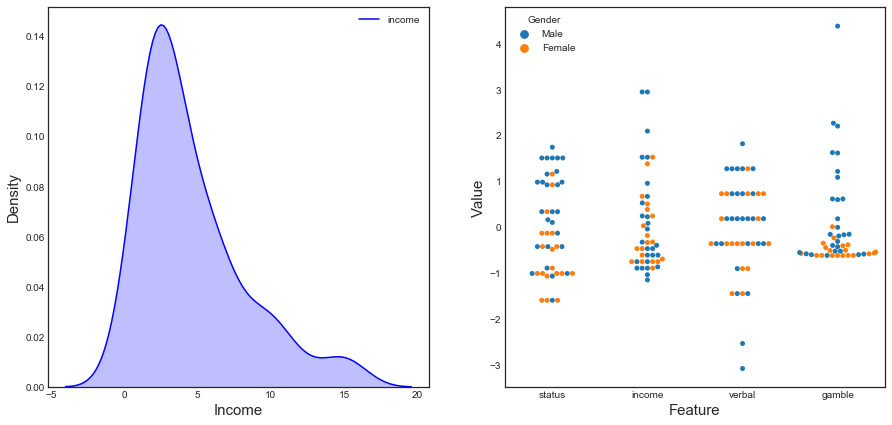

In [58]:
fig, (ax1, ax2)=plt.subplots(ncols=2, sharex=False, sharey=False)
fig.set_figwidth(15)
fig.set_figheight(7)

#First plot
sns.kdeplot(teengamb['income'], shade=True, color='b', ax=ax1)
ax1.set_xlabel('Income', fontsize=15)
ax1.set_ylabel('Density', fontsize=15)

#Second plot use swarm plot
## scale the data first
teengamb_std=pd.DataFrame(scale(teengamb[['status','income','verbal','gamble']], 
                                with_mean=True, with_std=True),
                          columns=['status','income','verbal','gamble'])
y=teengamb['sex']
teengamb_std1=pd.concat([y, teengamb_std], axis=1)
teengamb_std_plot=pd.melt(teengamb_std1, id_vars='sex', var_name='features', value_name='value')
sns.swarmplot(x='features', y='value', hue='sex', data=teengamb_std_plot, ax=ax2)
ax2.set_xlabel('Feature', fontsize=15)
ax2.set_ylabel('Value', fontsize=15)

handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Male','Female'], title='Gender')